# Rectangular Window

In this notebook, we analyze the **Rectangular Window**, which is one of the simplest window functions used in digital signal processing. Although it has poor frequency characteristics (e.g., high spectral leakage), it forms the basis for understanding more advanced windows.

We'll implement the window in Python, compute its spectrum, and visualize both the time-domain and frequency-domain representations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Analysis Parameters

We define the following analysis parameters:

- **M**: Window length
- **N**: Length of the FFT, typically chosen as a power of 2 and longer than M to improve frequency resolution.
- **dBCut**: A threshold in decibels used to clip the spectrum for better visualization.


In [2]:
M = 64  # Window length (even)
N = 2**int(np.ceil(np.log2(M * 16)))  # FFT length
dBCut = -100  # dB cut threshold

Modd = M % 2       # 0 if even, 1 if odd
Mo2 = (M - Modd) // 2  # Midpoint for zero-padding


## Rectangular Window

The rectangular window is simply a vector of ones. We also construct a **zero-padded version** of the window for a centered FFT.


In [3]:
# Time-domain rectangular window
wr = np.ones(M)

# Zero-padded buffer (circular shift for centering the window)
wrzp = np.concatenate([wr[Mo2:], np.zeros(N - M), wr[:Mo2]])

# FFT and magnitude in dB
eps = np.finfo(float).eps
Wrzp = np.fft.fft(wrzp)
magWr_dB = 20 * np.log10(np.abs(Wrzp) + eps) # Add small value to avoid log(0)
magWr_dB -= np.max(magWr_dB)  # Normalize to 0 dB max
magWr_dB = np.maximum(magWr_dB, dBCut)  # Clip at dBCut


## Visualization

We plot:

1. The time-domain shape of the window.
2. The magnitude of the FFT (in dB) vs normalized frequency.

The normalized frequency axis spans `[0, 1]` (corresponding to `[0, π]` in digital rad/sample).


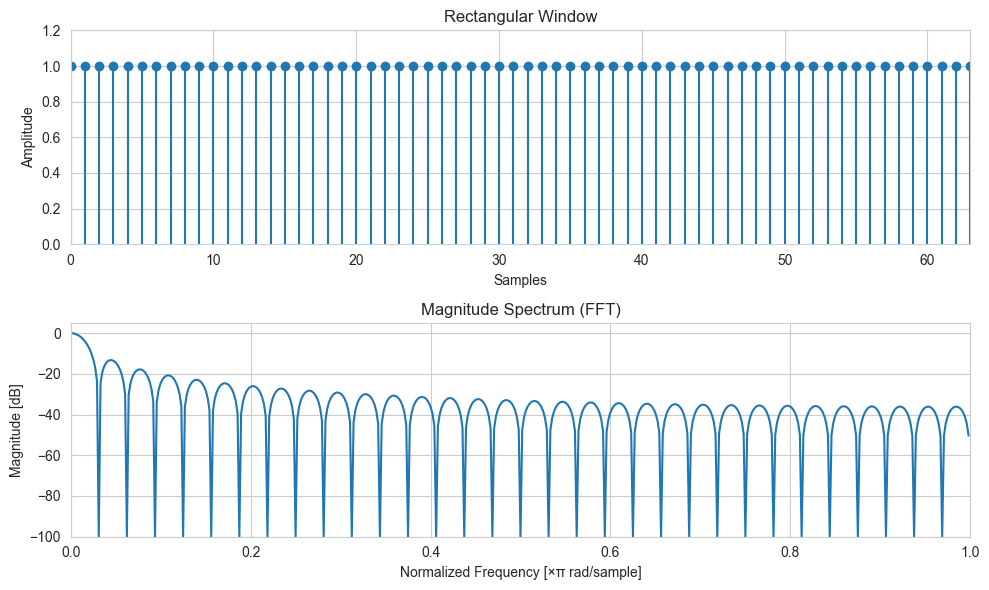

In [ ]:
# Time and frequency vectors
n = np.arange(M)
nf = np.linspace(0, 2, N, endpoint=False)  # Normalized frequency [0, 2)
nf = nf[:N//2]  # Only first half [0, 1]

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(n, wr, basefmt=" ")
plt.title('Rectangular Window')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim(0, M-1)
plt.ylim(0, 1.2)

plt.subplot(2, 1, 2)
plt.plot(nf, magWr_dB[:N//2])
plt.title('Magnitude Spectrum (FFT)')
plt.xlabel(r'Normalized Frequency [$\pi$ rad/sample]')
plt.ylabel('Magnitude [dB]')
plt.xlim(0, 1)
plt.ylim(dBCut, 5)
plt.grid(True)

plt.tight_layout()
plt.show()
